In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/mohamed-ashry7/Data-Engineering-Lab/main/Datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../Datasets/{dataset_name}'


In [ ]:
#Reading the data 
data = pd.read_csv('/content/Car_sale_ads.csv')

In [ ]:
# Checking the data
data

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [ ]:
'''
ID - unique ID of offer
Price - value of the price
Currency - currency of the price (mostly polish złoty, but also some euro)
Condition - new or used
Vehicle_brand - brand of vehicle in offer
Vehicle_model - model of vehicle in offer
Vehicle_generation - generation of vehicle in offer
Vehicle_version - version of vehicle in offer
Production_year - year of car production
Mileage_km - total distance that the car has driven in kilometers
Power_HP - car engine power in horsepower
Displacement_cm3 - car engine size in cubic centimeters
Fuel_type - car fuel type
CO2_emissions - car CO2 emissions in g/km
Drive - type of car drive
Transmission - type of car transmission
Type - car body style
Doors_number - number of car doors
Colour - car body color
Origin_country - country of origin of the car
First_owner - whether the owner is the first owner
First_registration_date - date of first registration
Offer_publication_date - date of publication of the offer
Offer_location - address provided by the issuer
Features - listed car features (ABS, airbag, parking sensors e.t.c)
'''

'\nID - unique ID of offer\nPrice - value of the price\nCurrency - currency of the price (mostly polish złoty, but also some euro)\nCondition - new or used\nVehicle_brand - brand of vehicle in offer\nVehicle_model - model of vehicle in offer\nVehicle_generation - generation of vehicle in offer\nVehicle_version - version of vehicle in offer\nProduction_year - year of car production\nMileage_km - total distance that the car has driven in kilometers\nPower_HP - car engine power in horsepower\nDisplacement_cm3 - car engine size in cubic centimeters\nFuel_type - car fuel type\nCO2_emissions - car CO2 emissions in g/km\nDrive - type of car drive\nTransmission - type of car transmission\nType - car body style\nDoors_number - number of car doors\nColour - car body color\nOrigin_country - country of origin of the car\nFirst_owner - whether the owner is the first owner\nFirst_registration_date - date of first registration\nOffer_publication_date - date of publication of the offer\nOffer_location

In [ ]:
# Number of rows and columns in the data set
data.shape

(208304, 25)

In [ ]:
# Names of all the column
for col in data.columns:
    print(col)

Index
Price
Currency
Condition
Vehicle_brand
Vehicle_model
Vehicle_version
Vehicle_generation
Production_year
Mileage_km
Power_HP
Displacement_cm3
Fuel_type
CO2_emissions
Drive
Transmission
Type
Doors_number
Colour
Origin_country
First_owner
First_registration_date
Offer_publication_date
Offer_location
Features


In [ ]:
# Checking the data type of each column to decide which imputation method we will use
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

In [ ]:
#General data statistics 
data.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,208304.000000,2.083040e+05,208304.000000,2.073210e+05,207661.000000,206338.000000,9.404700e+04,206817.000000
mean,104151.500000,6.305383e+04,2012.098241,1.502768e+05,151.836281,1882.567147,3.191564e+05,4.637138
std,60132.329574,8.665967e+04,6.998414,2.937447e+06,77.683546,729.609660,7.291396e+07,0.768559
min,0.000000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,52075.750000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,104151.500000,3.570000e+04,2013.000000,1.445660e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,156227.250000,7.599000e+04,2017.000000,2.060000e+05,172.000000,1997.000000,1.640000e+02,5.000000
max,208303.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


In [ ]:
#Total number of duplicated rows--> no duplicated row 
data.duplicated().sum()

0

In [ ]:
# Checking if there are missing data
data.isnull().values.any()

True

In [ ]:
#Missing values in the data
nullData=data.isnull().sum()
nullData

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

In [ ]:
# Percentage of missing data: ---> 12% of data are null values
data_count = np.product(data.shape)
(nullData.sum()/data_count)*100

11.917543590137491

In [ ]:
# Percentage of missing data in each column
data.isnull().sum() / data.shape[0] * 100

Index                       0.000000
Price                       0.000000
Currency                    0.000000
Condition                   0.000000
Vehicle_brand               0.000000
Vehicle_model               0.000000
Vehicle_version            33.711307
Vehicle_generation         29.017206
Production_year             0.000000
Mileage_km                  0.471906
Power_HP                    0.308683
Displacement_cm3            0.943813
Fuel_type                   0.000000
CO2_emissions              54.851083
Drive                       7.237499
Transmission                0.229952
Type                        0.000000
Doors_number                0.713861
Colour                      0.000000
Origin_country             43.202243
First_owner                68.750480
First_registration_date    58.500557
Offer_publication_date      0.000000
Offer_location              0.000000
Features                    0.000000
dtype: float64

Vehicle_version            
Vehicle_generation  
Origin_country 

First_registration_date


In [ ]:
# Dropping the columns with null values percentage higher than 60:
data.drop(['First_owner'], axis=1)

#col_to_drop = null_percentage[null_percentage>60].keys()
#output_df = df.drop(col_to_drop, axis=1)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Front wheels,Manual,coupe,2.0,silver,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,NaN,Automatic,small_cars,3.0,silver,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,NaN,Manual,small_cars,3.0,blue,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,NaN,Manual,small_cars,1.0,other,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Rear wheels,Manual,station_wagon,4.0,other,Poland,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,NaN,Manual,SUV,3.0,red,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,NaN,Manual,minivan,2.0,blue,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [ ]:
# Unique values in the dataset
data.nunique()

Index                      208304
Price                       14142
Currency                        2
Condition                       2
Vehicle_brand                 108
Vehicle_model                1203
Vehicle_version             19056
Vehicle_generation            569
Production_year                92
Mileage_km                  52007
Power_HP                      573
Displacement_cm3             1181
Fuel_type                       8
CO2_emissions                 372
Drive                           5
Transmission                    2
Type                            9
Doors_number                   10
Colour                         14
Origin_country                 37
First_owner                     1
First_registration_date      8441
Offer_publication_date         41
Offer_location              13635
Features                   177211
dtype: int64

In [ ]:
# Imputing the null values in column Vehicle version by groping it with vehicle model
#data.groupby('Vehicle_model', as_index=False)['Vehicle_version'].mode()
#df = data.fillna(data.groupby('Vehicle_model')['Vehicle_version'].transform('mode'))
#data['Vehicle_version'] = data['Vehicle_version'].fillna(data.groupby('Vehicle_model')['Vehicle_version'].transform('mode'))
#data.groupby([ 'Vehicle_model','Vehicle_version']).apply(pd.DataFrame.mode).reset_index(drop=True)
#data

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


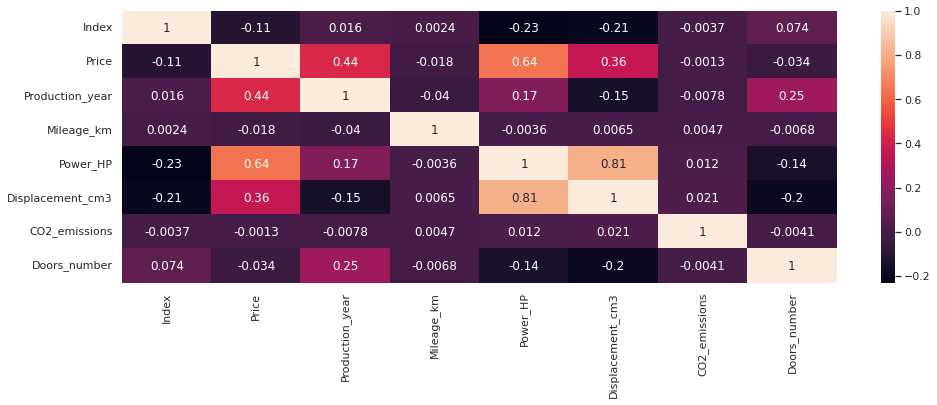

In [ ]:
df4 = pd.DataFrame(data)
corr_matrix = df4.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_matrix, annot=True) #,linewidths=.5)
#print(corr_matrix)

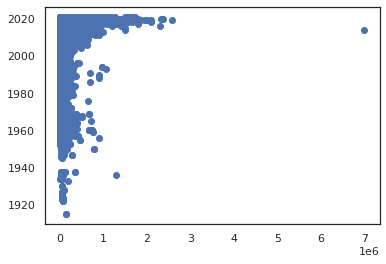

In [ ]:
plt.scatter(data['Price'], data['Production_year'])
plt.show()

In [ ]:
data['Vehicle_brand'].value_counts()[0:10]

Volkswagen       18455
BMW              16983
Audi             16730
Opel             16322
Ford             16007
Mercedes-Benz    12170
Renault          10702
Toyota           10206
Škoda            10166
Peugeot           9016
Name: Vehicle_brand, dtype: int64

In [ ]:
data.Fuel_type.unique()

array(['Gasoline', 'Gasoline + LPG', 'Diesel', 'Electric', 'Hybrid',
       'Gasoline + CNG', 'Hydrogen', 'Ethanol'], dtype=object)

Fuel_type
Diesel            92415
Electric           1553
Ethanol               2
Gasoline          99352
Gasoline + CNG       70
Gasoline + LPG     9027
Hybrid             5883
Hydrogen              2
Name: Fuel_type, dtype: int64


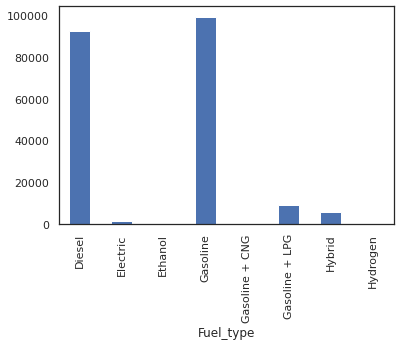

In [ ]:
df2 = data.groupby(['Fuel_type'])['Fuel_type'].count()
print(df2)
df2.plot(kind = 'bar')